# Лабораторная работа №1. Бинарная классификация фактографических данных

## Цель работы
Получить практические навыки решения задачи бинарной классификации данных в среде Jupyter Notebook. Научиться загружать данные, обучать классификаторы и проводить классификацию. Научиться оценивать точность полученных моделей.

## Выполнение работы

### 1. Была создана данная рабочая тетрадь для выполнения работы.

### 2. Импорт необходимых для работы библиотек и модулей

In [1]:
import numpy as np 

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0 #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
        if ax is None:
            ax = plt.gca()
        if fill:
            ax.contourf(X1, X2, decision_values.reshape(X1.shape),
            levels=fill_levels, colors=['cyan', 'pink', 'yellow'])
        if line:
            ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())

### 3. Загрузили данные в соответствие с вариантом

In [3]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=1, 
                           n_clusters_per_class=1,class_sep = 0.6 , random_state = 15)

### 4.Вывести первые 15 элементов выборки (координаты точек и метки класса)

In [4]:
print ("Координаты точек: ") 
print (X[:15])
print ("Метки класса: ") 
print (y[:15])

Координаты точек: 
[[-0.32654509 -0.48287283]
 [-0.56423228  0.36908979]
 [ 1.80734839  0.64084024]
 [-1.13815022 -0.3922336 ]
 [-0.77269253  0.98787649]
 [-0.76362783 -1.03345078]
 [ 1.27084064  1.02090267]
 [ 0.28768416  0.02922487]
 [-0.19381938 -1.04395297]
 [-0.8936574  -0.64384405]
 [ 0.30631716  0.81656104]
 [-1.64047657  0.40696626]
 [-0.49234077 -1.04988151]
 [ 1.17360256 -0.58037911]
 [-0.66270457 -0.25318302]]
Метки класса: 
[0 1 1 0 1 0 1 1 0 0 1 1 0 0 0]


### 5. Отобразили на графике сгенерированную выборку. Объекты разных классов имеют разные цвета.

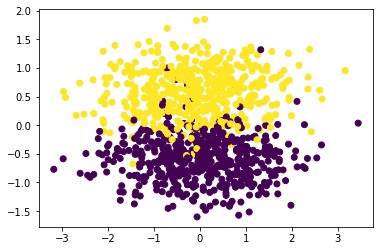

In [5]:
plt.scatter (X[:,0], X[:,1], c=y)
plt.show()

### 6. Разбили данные на обучающую (train) и тестовую (test) выборки в пропорции 75% - 25% соответственно.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

### 7. Отобразили на графике обучающую и тестовую выборки. Объекты разных классов имеют разные цвета.



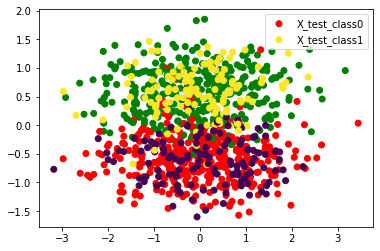

In [7]:
col=[]
for i in range(len(y_train)):
    if y_train[i]==0:
        col.append('red')
    else:
        col.append('green')
plt.scatter (X_train[:,0], X_train[:,1], c=col)
plt.scatter (X_test[:,0], X_test[:,1], c=y_test)
plt.legend(['X_test_class0','X_test_class1'])
plt.show()

### 8. Реализовали модели классификаторов, обучили их на обучающем множестве. Применили модели на тестовой выборке, вывели результаты классификации:

- Истинные и предсказанные метки классов
- Матрицу ошибок (confusion matrix)
- Значения полноты, точности, f1-меры и аккуратности
- Значение площади под кривой ошибок (AUC ROC)
- Отобразить на графике область принятия решений по каждому классу

Prediction and test: 
[1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0
 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0
 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1
 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1] 

[1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1
 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 1 1 0 1

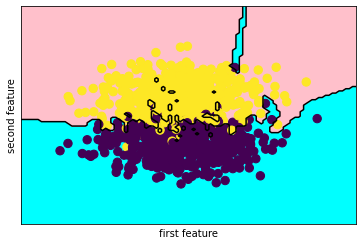

In [8]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn.fit(X_train, y_train)
KNeighborsClassifier(metric='euclidean', n_neighbors=1)
prediction = knn.predict(X_test)
print ('Prediction and test: ')
print (prediction,'\n')
print (y_test)
print ('\nConfusion matrix: ')
print (confusion_matrix(y_test, prediction))
print ('\nAccuracy score: ', accuracy_score(prediction, y_test),'\n')
print(classification_report(y_test, prediction))
print('\nAUC ROC: ',roc_auc_score(y_test, prediction))
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70);

Prediction and test: 
[1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0
 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0
 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1
 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1] 

[1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1
 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 1 1 0 1

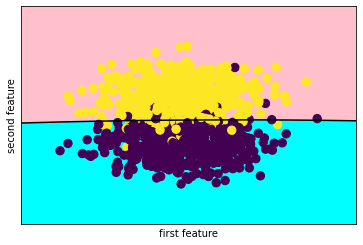

In [9]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

prediction_NB = gnb.predict(X_test)

print ('Prediction and test: ')
print (prediction_NB,'\n')
print (y_test)

print ('\nConfusion matrix:')
print (confusion_matrix(y_test, prediction_NB))

print ('\nAccuracy score: ', accuracy_score(prediction_NB, y_test),'\n')
print(classification_report(y_test, prediction_NB))

print('\nAUC ROC: ', roc_auc_score(y_test, prediction_NB))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70);

Prediction and test: 
[1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0
 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0
 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1
 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1] 

[1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1
 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 1 1 0 1

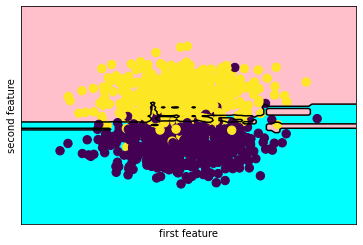

In [10]:
clf = RandomForestClassifier(n_estimators = 5)
clf.fit(X_train, y_train)

prediction_RF = clf.predict(X_test)

print ('Prediction and test: ')
print (prediction_RF,'\n')
print (y_test)

print ('\nConfusion matrix:')
print (confusion_matrix(y_test, prediction_RF))
print ('\nAccuracy score: ', accuracy_score(prediction_RF, y_test))
print('\n', classification_report(y_test, prediction_RF))

print('\nAUC ROC:', roc_auc_score(y_test, prediction_RF))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(clf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70);

### 9. По результатам п.8 занесли в отчет таблицу с результатами классификации всеми методами.

|           |   | Метод k-ближайших соседей | Наивный Байесовский метод | Random Forest |
|-----------|---|---------------------------|:-------------------------:|---------------|
| Precision | 0 |            0.91           |            0.93           |      0.93     |
|           | 1 |            0.89           |            0.97           |      0.89     |
| Recall    | 0 |            0.9            |            0.97           |      0.89     |
|           | 1 |            0.9            |            0.92           |      0.93     |
| Fl-score  |   |            0.9            |            0.95           |      0.91     |
| Accuracy  |   |            0.9            |            0.94           |      0.91     |
| AUC ROC   |   |            0.9            |            0.94           |      0.91     |

### 10. Изучили, как изменится качество классификации в случае другого разбиения выборки на обучающую и тестовую. Для этого повторили пункты 6, передав в параметр random_state новое значение, и пункты 8-9 дважды.

In [11]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.25, random_state = 2)

Prediction and test: 
[0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0
 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0
 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0] 

[0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0
 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 1 0

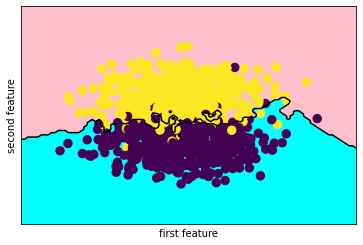

In [12]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
knn.fit(X_train_2, y_train_2)
KNeighborsClassifier(metric='euclidean', n_neighbors=1)

prediction2 = knn.predict(X_test_2)

print ('Prediction and test: ')
print (prediction2,'\n')
print (y_test_2)
print ('\nConfusion matrix:')
print (confusion_matrix(y_test_2, prediction2))
print ('\nAccuracy score: ', accuracy_score(prediction2, y_test_2))
print('\n', classification_report(y_test_2, prediction2))
print('\nAUC ROC:', roc_auc_score(y_test_2, prediction2))

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70);

Prediction and test: 
[0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0
 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0
 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0] 

[0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0
 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 1 0

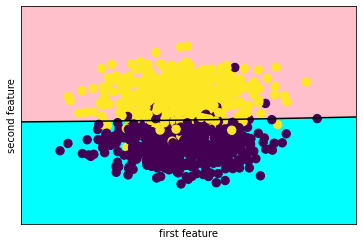

In [13]:
gnb = GaussianNB()
gnb.fit(X_train_2, y_train_2)

prediction_NB_2 = gnb.predict(X_test_2)

print ('Prediction and test: ')
print (prediction_NB_2,'\n')
print (y_test_2)
print ('\nConfusion matrix:')
print (confusion_matrix(y_test_2, prediction_NB_2))
print ('\nAccuracy score: ', accuracy_score(prediction_NB_2, y_test_2))
print('\n', classification_report(y_test_2, prediction_NB_2))
print('\nAUC ROC:', roc_auc_score(y_test_2, prediction_NB_2))
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70);

Prediction and test: 
[0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0
 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0
 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0] 

[0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0
 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0
 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 1 0

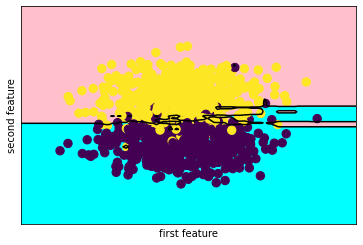

In [14]:
clf = RandomForestClassifier(n_estimators = 15)
clf.fit(X_train_2, y_train_2)

prediction_RF_2 = clf.predict(X_test_2)
print ('Prediction and test: ')
print (prediction_RF_2,'\n')
print (y_test_2)
print ('\nConfusion matrix:')
print (confusion_matrix(y_test_2, prediction_RF_2))
print ('\nAccuracy score: ', accuracy_score(prediction_RF_2, y_test_2))
print('\n', classification_report(y_test_2, prediction_RF_2))
print('\nAUC ROC: ', roc_auc_score(y_test_2, prediction_RF_2))
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(clf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70);

In [15]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.25, random_state = 5)

Prediction and test: 
[0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1
 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1
 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0] 

[0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1
 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 1 1 0 0 0 1 0 0 0

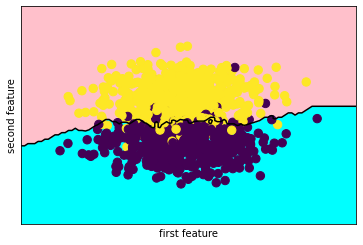

In [16]:
knn = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')
knn.fit(X_train_3, y_train_3)
KNeighborsClassifier(metric='euclidean', n_neighbors=1)
prediction3 = knn.predict(X_test_3)
print ('Prediction and test: ')
print (prediction3,'\n')
print (y_test_3)
print ('\nConfusion matrix:')
print (confusion_matrix(y_test_3, prediction3))
print ('\nAccuracy score: ', accuracy_score(prediction3, y_test_3))
print('\n', classification_report(y_test_3, prediction3))
print('\nAUC ROC:', roc_auc_score(y_test_3, prediction3))
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70);

Prediction and test: 
[0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1
 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1
 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1
 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0] 

[0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1
 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 1 1 0 0 0 1 0 0 0

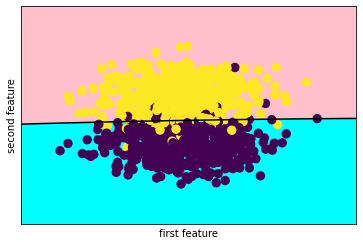

In [17]:
gnb = GaussianNB()
gnb.fit(X_train_3, y_train_3)
prediction_NB_3 = gnb.predict(X_test_3)
print ('Prediction and test: ')
print (prediction_NB_3,'\n')
print (y_test_3)
print ('\nConfusion matrix:')
print (confusion_matrix(y_test_3, prediction_NB_3))
print ('\nAccuracy score: ', accuracy_score(prediction_NB_3, y_test_3))
print('\n', classification_report(y_test_3, prediction_NB_3))
print('\nAUC ROC:', roc_auc_score(y_test_3, prediction_NB_3))
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(gnb, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70);

Prediction and test: 
[0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0
 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1
 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0
 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1
 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0] 

[0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0
 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1
 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 1 1 0 0 0 1 0 0 0

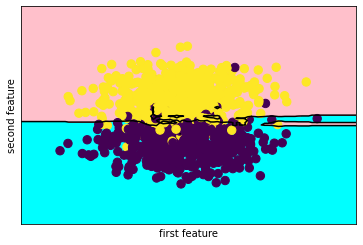

In [18]:
clf = RandomForestClassifier(n_estimators = 50)
clf.fit(X_train_3, y_train_3)
prediction_RF_3 = clf.predict(X_test_3)
print ('Prediction and test: ')
print (prediction_RF_3,'\n')
print (y_test_3)
print ('\nConfusion matrix:')
print (confusion_matrix(y_test_3, prediction_RF_3))
print ('\nAccuracy score: ', accuracy_score(prediction_RF_3, y_test_3))
print('\n', classification_report(y_test_3, prediction_RF_3))
print('\nAUC ROC: ', roc_auc_score(y_test_3, prediction_RF_3))
plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(clf, X, fill=True)
plt.scatter(X[:, 0], X[:, 1], c=y, s=70);

### 11. По результатам трех экспериментов составили итоговую таблицу о качестве классификаци каждым методом, включив в нее значения полноты, точности, f1-меры, аккуратности и площади под кривой ошибок. Сделали выводы о наиболее подходящем методе классификации данных

|           |   |                           | Итерация 1                |               |                           | Итерация 2                |               |                           | Итерация 3                |               |
|-----------|---|---------------------------|---------------------------|---------------|---------------------------|---------------------------|---------------|---------------------------|---------------------------|---------------|
|           |   | Метод k-ближайших соседей | Наивный Байесовский метод | Random Forest | Метод k-ближайших соседей | Наивный Байесовский метод | Random Forest | Метод k-ближайших соседей | Наивный Байесовский метод | Random Forest |
| Precision | 0 |            0.91           |            0.93           |      0.93     |            0.91           |            0.94           |      0.94     |            0.94           |            0.92           | 0.93          |
|           | 1 |            0.89           |            0.97           |      0.89     |            0.94           |            0.95           |      0.93     |            0.92           |            0.93           | 0.92          |
| Recall    | 0 |            0.9            |            0.97           |      0.89     |            0.95           |            0.96           |      0.94     |            0.92           |            0.94           | 0.93          |
|           | 1 |            0.9            |            0.92           |      0.93     |            0.9            |            0.92           |      0.93     |            0.93           |            0.91           | 0.91          |
| Fl-score  |   |            0.9            |            0.95           |      0.91     |            0.93           |            0.95           |      0.94     |            0.93           |            0.93           | 0.93          |
| Accuracy  |   |            0.9            |            0.94           |      0.91     |            0.92           |            0.94           |      0.93     |           0.928           |            0.92           | 0.92          |
| AUC ROC   |   |            0.9            |            0.94           |      0.91     |            0.92           |            0.94           |      0.93     |           0.928           |            0.92           | 0.92          |

## Вывод 
В ходе выполнения работы я получил практические навыки решения задачи бинарной классификации данных в среде Jupyter Notebook. Научился загружать данные, обучать классификаторы и проводить классификацию. Научился оценивать точность полученных моделей.
По таблице видно, что лучше всего справился с классификацией наивный Байесовский метод в первой итерации, при этом случайное перемешивание данных при разбиении на тестовую и обучающую выборку снизило точность модели. 

У метода к-средних наблюдается увеличение точности с увеличением параметра к (кол-ва соседей), в данном случае метод оказался нечувствительным к перемешиванию данных.

Random Forest в первых двух итерациях имеет практически одинаковые показатели оценок качества, в последней итерации на метрики повлияло перемешивание данных.
